### Circular Boxplots Showing Relevant Diseases Withing Each Subgroup

In [1]:
import psycopg2
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#make sure to change input to connection to ur postgres account 
conn = psycopg2.connect(
    host="localhost",
    database="mimic",
    user="postgres"
#     , password= [your password], 
#     port = "5431" [change to your port db]
)
conn.autocommit = True
cursor = conn.cursor()

In [3]:
sql = """
SELECT * FROM ELIXHAUSER_MATCH;
"""

#### Import CSV file from running the helper_script file "selected_dataset.sql" and converting the returned table into a csv

In [4]:
all_data = pd.read_sql_query(sql, conn)

/var/folders/07/9pcptmds0fl8q4v1tqm04jph0000gn/T/ipykernel_8885/2844448536.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_data = pd.read_sql_query(sql, conn)


In [15]:
conn.close()

#### Import six subgroups outputted from Latent Class Analysis 

In [6]:
#this data should be created during LCA and is added to the preprocess data 
cardiopulmanary = pd.read_csv('../processed_data/subgroup_4.csv')
young = pd.read_csv('../processed_data/subgroup_3.csv')
hepatic_addiction = pd.read_csv('../processed_data/subgroup_7.csv')
complicated_diabetes = pd.read_csv('../processed_data/subgroup_6.csv')
uncomplicated_diabetes = pd.read_csv('../processed_data/subgroup_1.csv')
cardiac = pd.read_csv('../processed_data/subgroup_2.csv')



#### Helper function to create circular barplots

In [7]:
def create_circular_plot(table, threshold):
    X = pd.DataFrame(table.sum()[4:-3]/len(table), columns = ['Value'])
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))

    # Plot polar axis
    ax = plt.subplot(111, polar=True)

    # Remove grid
    plt.axis('off')

    # Set the coordinate limits
    upper_limit = 1  # Update upper limit to 1 since we want proportion values
    lower_limit = 0.1  # Lower limit is usually 0 for proportion values

    # Normalize the values between the upper and lower limits
    max_value = X['Value'].max()
    min_value = X['Value'].min()
    normalized_values = (X['Value'] - min_value) / (max_value - min_value)

    # Calculate heights based on normalized values
    heights = (upper_limit - lower_limit) * normalized_values + lower_limit

    width = 2 * np.pi / len(X.index)

    indexes = list(range(1, len(X.index) + 1))
    angles = [element * width for element in indexes]

    bars = ax.bar(
        x=angles,
        height=heights,
        width=width,
        bottom=lower_limit,
        linewidth=2,
        edgecolor="white"
    )

    label_padding = 0.1  # Adjust label padding as needed
    for bar, angle, height, label, value in zip(bars, angles, heights, X.index, X['Value']):
        if value > threshold:
            rotation = np.rad2deg(angle)

            # Flip some labels upside down
            alignment = ""
            if np.pi / 2 <= angle < 3 * np.pi / 2:
                alignment = "right"
                rotation += 180
            else:
                alignment = "left"

            # Finally, add the labels
            ax.text(
                x=angle,
                y=lower_limit + bar.get_height() + label_padding,
                s=label,
                ha=alignment,
                va='center',
                rotation=rotation,
                rotation_mode="anchor"
            )

    plt.show()

#### Circular Subplot for All Data 

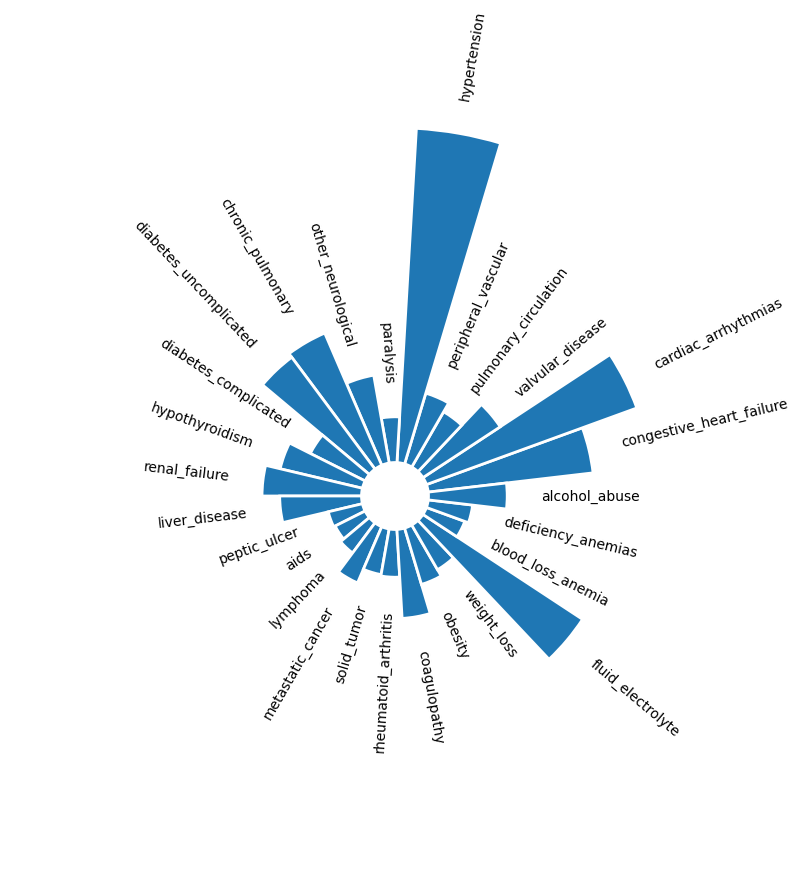

In [8]:
create_circular_plot(all_data, 0)

#### Circular Subplot for Cardiopulmanary Data - Subgroup 1 (In Paper)

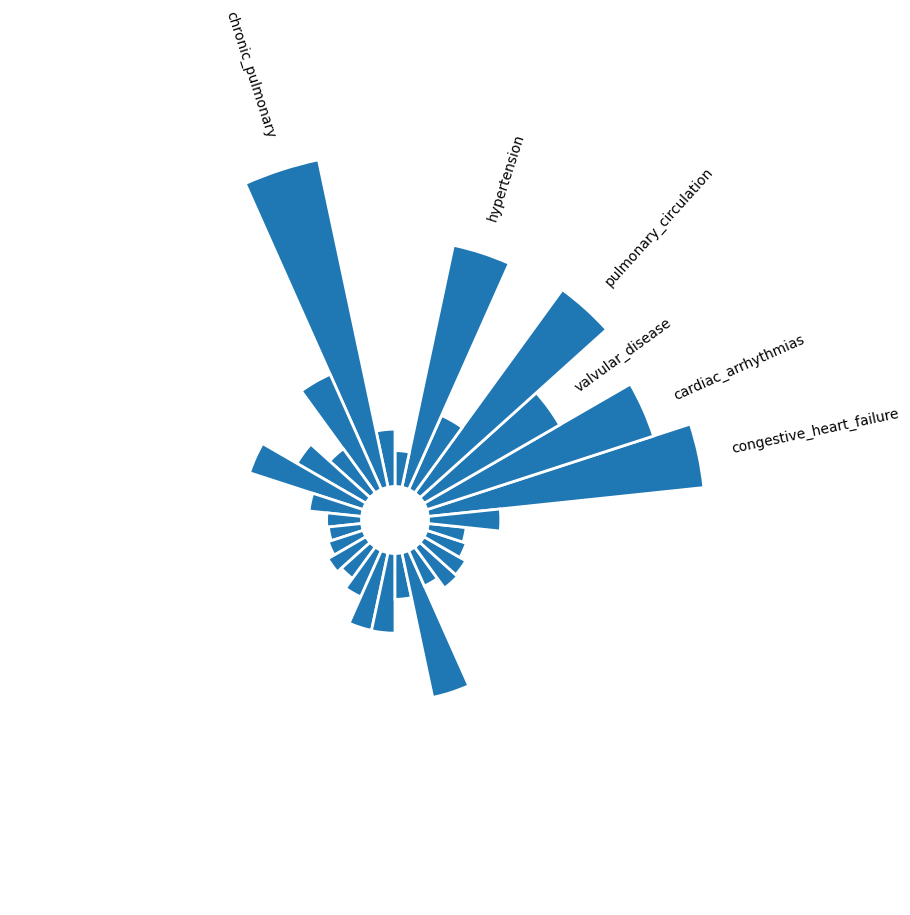

In [9]:
create_circular_plot(cardiopulmanary, 0.36)

#### Circular Subplot for Young Subgroup - Subgroup 2 (In Paper)

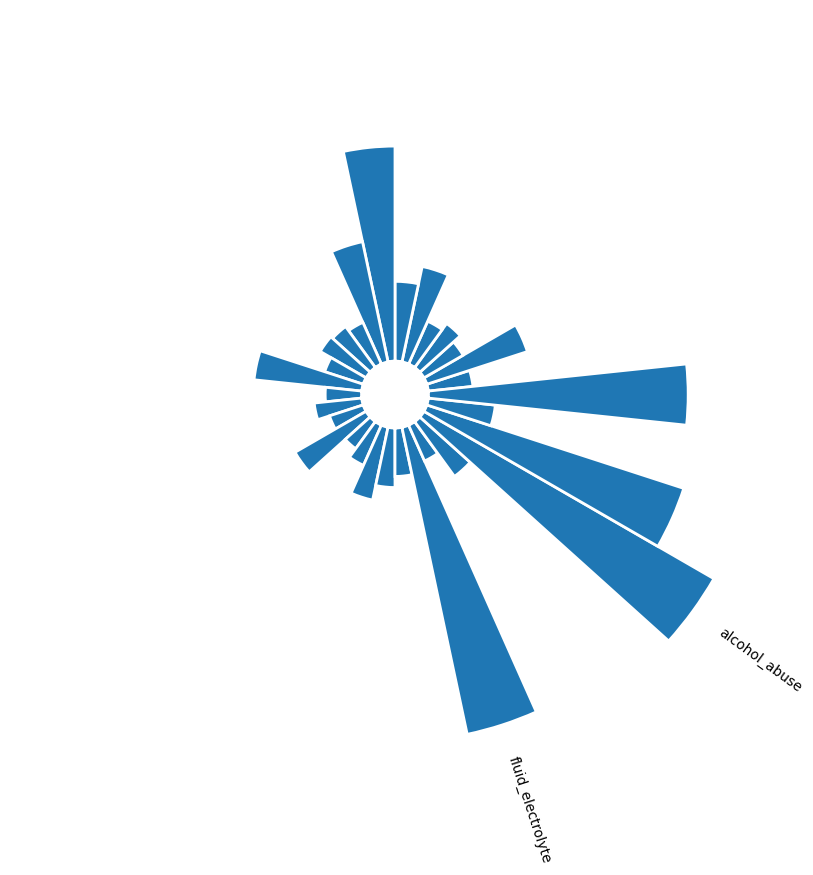

In [10]:
create_circular_plot(young, 0.17)

#### Circular Subplot for Hepatic and Addiction - Subgroup 3 (In Paper)

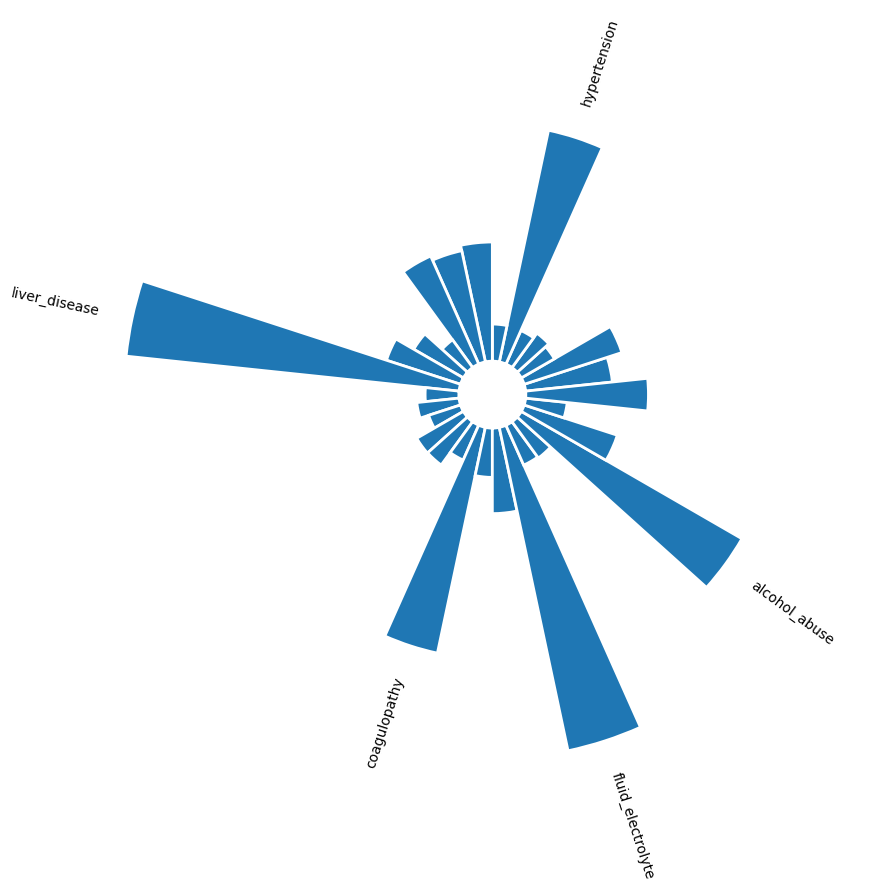

In [11]:
create_circular_plot(hepatic_addiction, 0.3)

#### Circular Subplot for Complicated Diabetes - Subgroup 4 (In Paper)

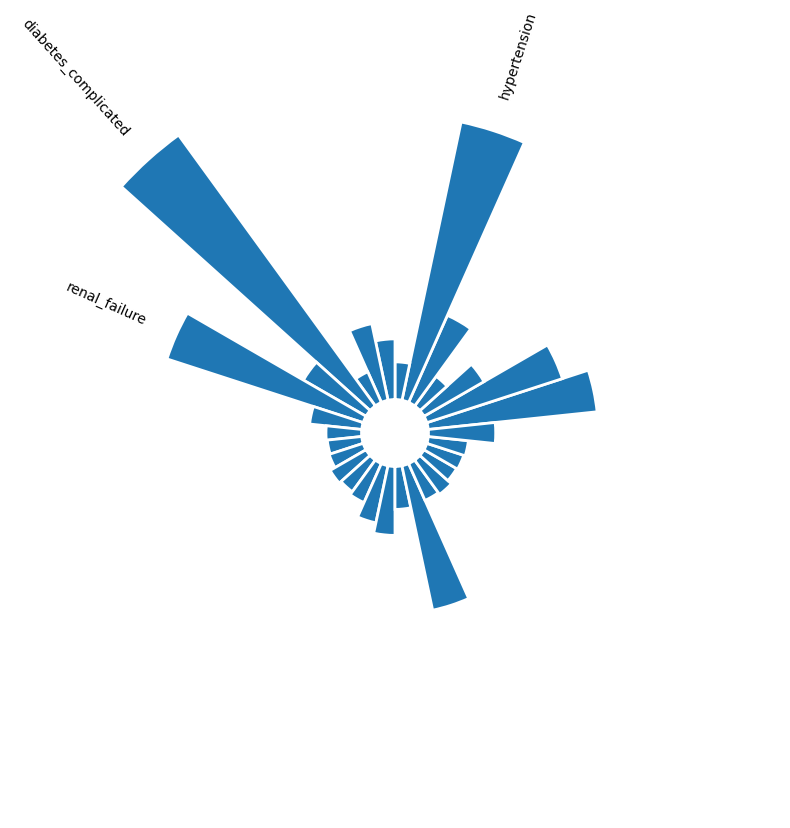

In [12]:
create_circular_plot(complicated_diabetes, 0.5)

#### Circular Subplot for Uncomplicated Diabetes - Subgroup 5 (In Paper)

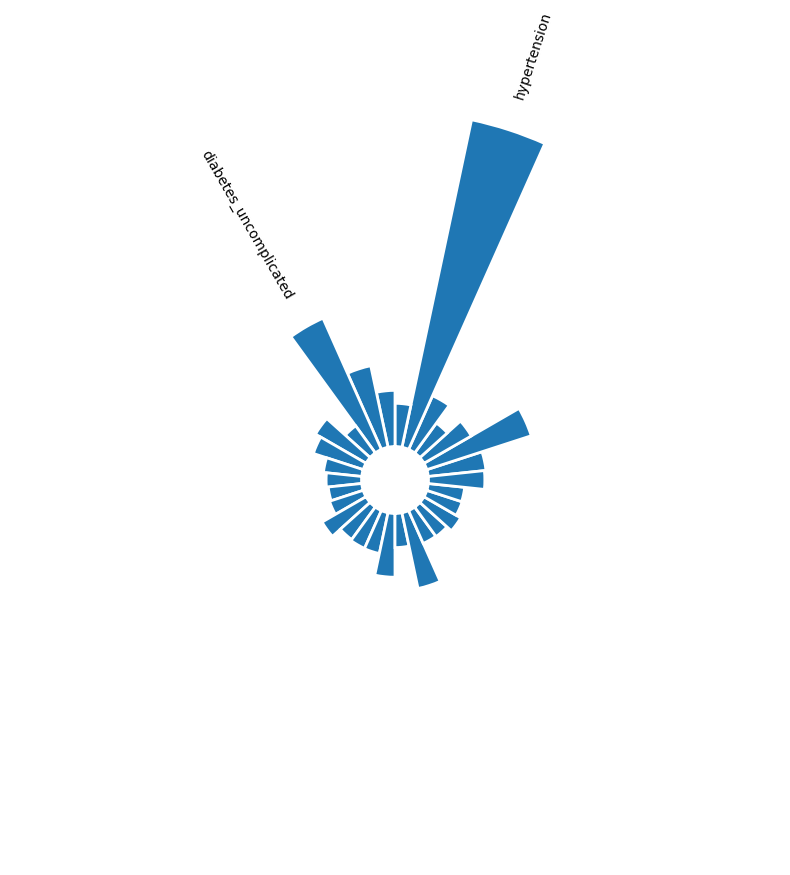

In [13]:
create_circular_plot(uncomplicated_diabetes, 0.3)

#### Circular Subplot for Cardia - Subgroup 6 (In Paper)

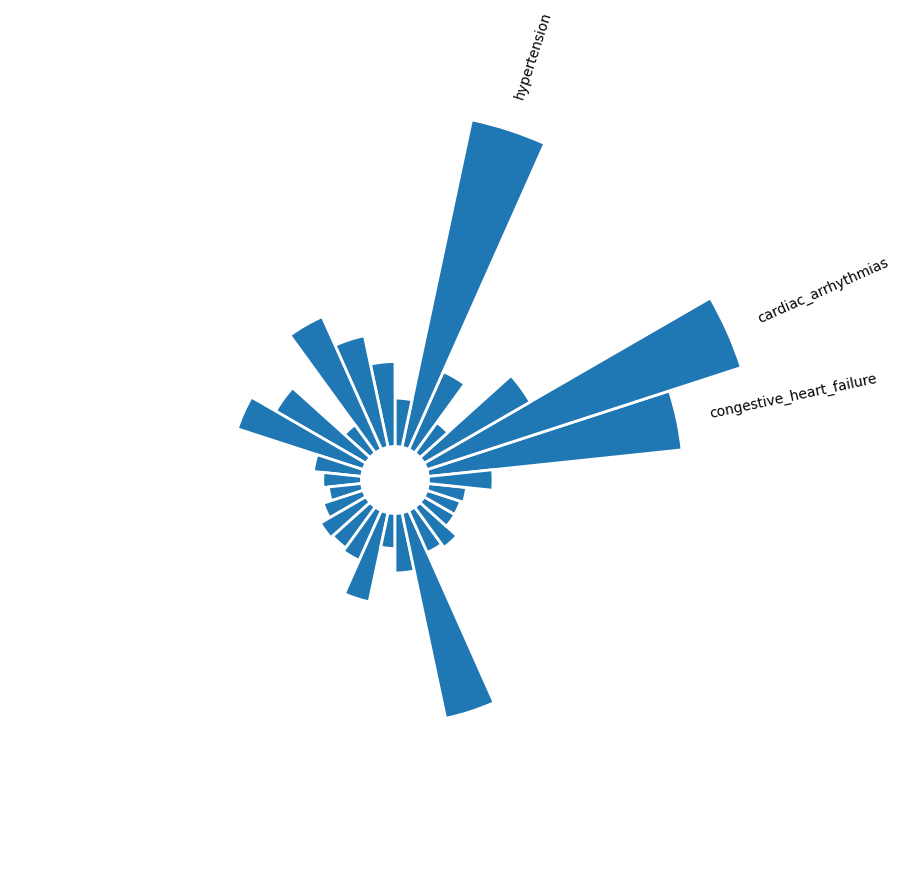

In [14]:
create_circular_plot(cardiac, 0.45)